In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

## Color conversions(BGR --> Gray and BGR --> HSV)

* For color conversion, we use the function cv2.cvtColor(input_image, flag) where flag determines the type of conversion.
* For BGR --> Gray conversion we use the flags cv2.COLOR_BGR2GRAY. Similarly for BGR --> HSV, we use the flag cv2.COLOR_BGR2HSV.
* to see the other flags present in color conversions
* uncomment the below lines to see the number of conversions available 

In [41]:
#count=0     
#flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
#for i in flags:
#    count+=1
#print(count)    
#print (flags)

## Image Thresholding Techniques

### Simple Thresholding
* If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). 
* The function used is cv2.threshold. First argument is the source image, which should be a grayscale image. 
* Second argument is the threshold value which is used to classify the pixel values. 
* Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value.
* Two outputs are obtained. First one is a retval. Second output is our thresholded image.

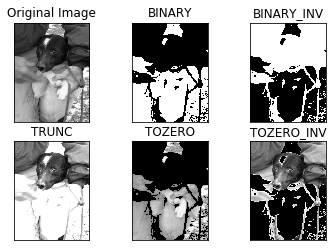

In [42]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(r'C:\Users\hp\Desktop\Kavya\NIT TRICHY\Data Science\Cat Classifier\dogs-vs-cats\test1\1.jpg',0)

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

### Adaptive Thresholding

* It is used in conditions where the image has different lighting conditions in different areas. 
* In this, the algorithm calculate the threshold for a small regions of the image. 
* So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.
* It has three ‘special’ input params and only one output argument.
    * Adaptive Method - It decides how thresholding value is calculated. cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area. cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.
    * Block Size - It decides the size of neighbourhood area.
    * C - It is just a constant which is subtracted from the mean or weighted mean calculated.
* increasing the block size and making it such that block size%2 is not zero and greater than one enhances the image detection and the edges are clearly outlined   

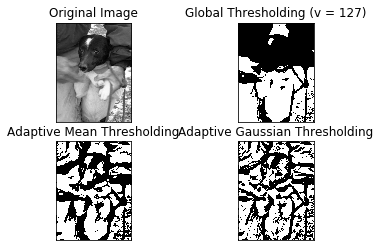

In [2]:
img = cv2.imread(r'C:\Users\hp\Desktop\Kavya\NIT TRICHY\Data Science\Cat Classifier\dogs-vs-cats\test1\1.jpg',0)
# the image should be read i grayscaled version only
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# the first parameter is the source image
# the second parameter is the max value of the pixel
# the third parameter is the adaptive method
# the fourth parameter is the method of binarizing each block
# the fifth parameter is the block size
# the sixth parameter is the constant gamma

th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 97,2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 97, 2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show() 

### Otsu's Binarization

* In global thresholding, we used an arbitrary value for threshold value, but to know whether it is an optimum value or not, trial and error is the way. 
* A bimodal image is an image whose histogram has two peaks. 
* For a bimodal image, we can approximately take a value in the middle of those peaks as threshold value. That is what Otsu binarization does. 
* So in simple words, it automatically calculates a threshold value from image histogram for a bimodal image. * For images which are not bimodal, binarization won’t be accurate.
* cv2.threshold() function is used with an extra flag, cv2.THRESH_OTSU. For threshold value, simply pass zero.
* Then the algorithm finds the optimal threshold value and returns you as the second output, retVal. If Otsu thresholding is not used, retVal is same as the threshold value you used.

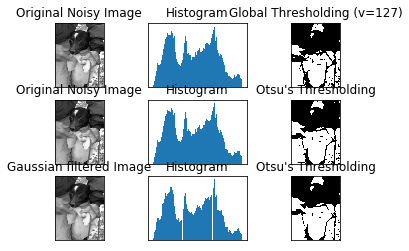

In [8]:
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    #to plot the grayscaled images
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    #to plot the histograms
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    #to plot the thresholded images
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

## Geometric Transformations

* cv2.warpAffine takes a 2x3 transformation matrix while cv2.warpPerspective takes a 3x3 transformation matrix as input.

### Scaling
* Scaling is just resizing of the image and cv2.resize() for this purpose. 
* The size of the image can be specified manually, or you can specify the scaling factor. 
* Different interpolation methods used are: 
    * cv2.INTER_AREA for shrinking 
    * cv2.INTER_CUBIC (slow)
    * cv2.INTER_LINEAR for zooming. 
* By default, cv2.INTER_LINEAR is used for all resizing purposes. 

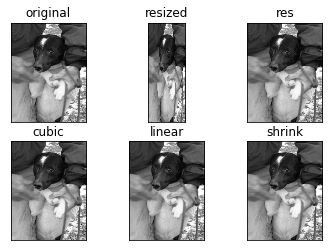

In [16]:
# for the original image
plt.subplot(2,3,1),plt.imshow(img,'gray')
plt.title("original"), plt.xticks([]), plt.yticks([])

#for resizing the image in a ratio of fx:fy
res = cv2.resize(img,None,fx=9, fy=18, interpolation = cv2.INTER_CUBIC)
plt.subplot(2,3,2),plt.imshow(res,'gray')
plt.title("resized"), plt.xticks([]), plt.yticks([])
#OR

height, width = img.shape[:2]# defining variables
res2 = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
plt.subplot(2,3,3),plt.imshow(res2,'gray')
plt.title("res"), plt.xticks([]), plt.yticks([])

#cubic interpolation
cubic = cv2.resize(img,None,fx=9, fy=9, interpolation = cv2.INTER_CUBIC)
plt.subplot(2,3,4),plt.imshow(cubic,'gray')
plt.title("cubic"), plt.xticks([]), plt.yticks([])

#linear interpolation
linear = cv2.resize(img,None,fx=9, fy=9, interpolation = cv2.INTER_LINEAR)
plt.subplot(2,3,5),plt.imshow(linear,'gray')
plt.title("linear"), plt.xticks([]), plt.yticks([])

#area interpolation
height, width = img.shape[:2]
shrink = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_AREA)
plt.subplot(2,3,6),plt.imshow(shrink,'gray')
plt.title("shrink"), plt.xticks([]), plt.yticks([])

plt.show()

### Translation
* Translation is the shifting of object’s location. If you know that the shift in (x,y) direction, let it be (tx,ty), you can create the transformation matrix.
* You can make it into a Numpy array of type np.float32 and pass it into cv2.warpAffine() function.
* Third argument of the cv2.warpAffine() function is the size of the output image, which should be in the form of (width, height)[Remember width = number of columns, and height = number of rows]

In [27]:
rows,cols = img.shape

M = np.float32([[1,0,50],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Rotation
* Rotation of an image for an angle is achieved by the transformation matrix of the form

M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta   \end{bmatrix}

* But OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. Modified transformation matrix is given by

\begin{bmatrix} \alpha &  \beta & (1- \alpha )  \cdot center.x -  \beta \cdot center.y \\ - \beta &  \alpha &  \beta \cdot center.x + (1- \alpha )  \cdot center.y \end{bmatrix}

where:

\begin{array}{l} \alpha =  scale \cdot \cos \theta , \\ \beta =  scale \cdot \sin \theta \end{array}
* To find this transformation matrix, OpenCV provides a function, cv2.getRotationMatrix2D.

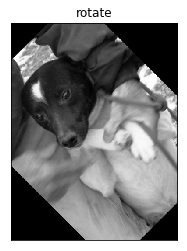

In [32]:
rows,cols = img.shape
#the dimensions of the image
#the angle by which the image is rotated
#scaling factor

M = cv2.getRotationMatrix2D((cols/2,rows/2),45,1) #the dimensions of the image,the angle by which the image is rotated,scaling factor
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst,'gray')
plt.title("rotate"), plt.xticks([]), plt.yticks([])

plt.show()


### Affine Transformation
* In affine transformation, all parallel lines in the original image will still be parallel in the output image.
* To find the transformation matrix, we need three points from input image and their corresponding locations in output image. 
* cv2.getAffineTransform will create a 2x3 matrix which is to be passed to cv2.warpAffine.

affine: (2, 3)
warp affine: (499, 375, 3)


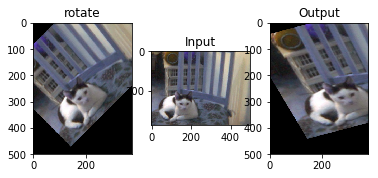

In [35]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
img = cv2.imread(r'C:\Users\hp\Desktop\Kavya\NIT TRICHY\Data Science\Cat Classifier\dogs-vs-cats\test1\81.jpg',1)
cols,rows= img.shape[:2]
M = cv2.getAffineTransform(pts1,pts2)
print("affine:",M.shape)

dst = cv2.warpAffine(img,M,(cols,rows))
print("warp affine:",dst.shape)

N = cv2.getRotationMatrix2D((cols/2,rows/2),45,1) #the dimensions of the image,the angle by which the image is rotated,scaling factor
dst2 = cv2.warpAffine(img,N,(cols,rows))
plt.subplot(131),plt.imshow(dst2),plt.title("rotate")
plt.subplot(132),plt.imshow(img),plt.title('Input')
plt.subplot(133),plt.imshow(dst),plt.title('Output')
plt.show()

### Perspective Transformation
* For perspective transformation, you need a 3x3 transformation matrix. 
* Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. 
* Among these 4 points, 3 of them should not be collinear. Then transformation matrix can be found by the function cv2.getPerspectiveTransform. 
* Then apply cv2.warpPerspective with this 3x3 transformation matrix.

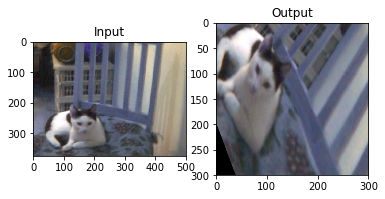

In [21]:
pts1 = np.float32([[0,300],[300,0],[200,400],[400,200]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## Smoothing of Images
* An LPF helps in removing noise, or blurring the image. An HPF filters helps in finding edges in an image.
* cv2.filter2D() - to convolve a kernel with an image


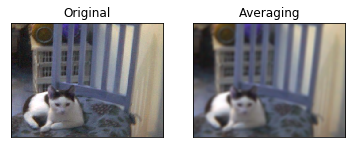

In [34]:
kernel = np.ones((10,10),np.float32)/100
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

### Blurring techniques
* Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. 
* It actually removes high frequency content (e.g: noise, edges) from the image resulting in edges being blurred when this is filter is applied. 
* There are blurring techniques which do not blur edges. 

#### Averaging
* This is done by convolving the image with a normalized box filter. 
* It simply takes the average of all the pixels under kernel area and replaces the central element with this average. 
* This is done by the function cv2.blur() or cv2.boxFilter().
* If you don’t want to use a normalized box filter, use cv2.boxFilter() and pass the argument normalize=False to the function.

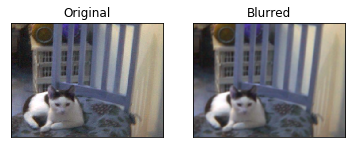

In [46]:
# to blur an image without having to use the filter function
blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

#### Gaussian Filtering
* In this approach, instead of a box filter consisting of equal filter coefficients, a Gaussian kernel is used. It is done with the function, cv2.GaussianBlur(). 
    * We should specify the width and height of the kernel which should be positive and odd. 
    * We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. 
    * If only sigmaX is specified, sigmaY is taken as equal to sigmaX. If both are given as zeros, they are calculated from the kernel size. 
* Gaussian filtering is highly effective in removing Gaussian noise from the image.
* If you want, you can create a Gaussian kernel with the function, cv2.getGaussianKernel().

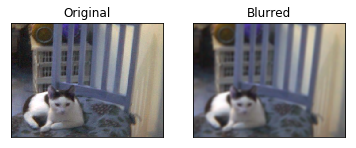

In [53]:
blur = cv2.GaussianBlur(img,(9,9),sigmaX=5,sigmaY=6)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

#### Median Filtering
* Here, the function cv2.medianBlur() computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value. 
* This is highly effective in removing salt-and-pepper noise. 
* One interesting thing to note is that, in the Gaussian and box filters, the filtered value for the central element can be a value which may not exist in the original image. However this is not the case in median filtering, since the central element is always replaced by some pixel value in the image. This reduces the noise effectively. 
* The kernel size must be a positive odd integer.

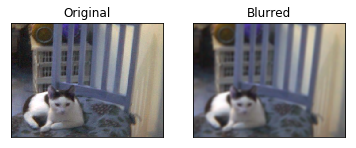

In [54]:
median = cv2.medianBlur(img,5)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

#### Bilateral Filtering

* cv2.bilateralFilter() is highly effective at noise removal while preserving edges. But the operation is slower compared to other filters. 
* A Gaussian filter takes the neighborhood around the pixel and finds its Gaussian weighted average. This Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It does not consider whether pixels have almost the same intensity value and does not consider whether the pixel lies on an edge or not. The resulting effect is that Gaussian filters tend to blur edges, which is undesirable.
* The bilateral filter also uses a Gaussian filter in the space domain, but it also uses one more (multiplicative) Gaussian filter component which is a function of pixel intensity differences. The Gaussian function of space makes sure that only pixels or ‘spatial neighbors’ are considered for filtering, while the Gaussian component applied in the intensity domain (a Gaussian function of intensity differences) ensures that only those pixels with intensities similar to that of the central pixel (‘intensity neighbors’) are included to compute the blurred intensity value. 
* As a result, this method preserves edges, since for pixels lying near edges, neighboring pixels placed on the other side of the edge, and therefore exhibiting large intensity variations when compared to the central pixel, will not be included for blurring.

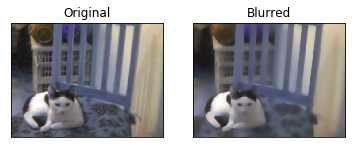

In [9]:
blur = cv2.bilateralFilter(img,20,75,75)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

#### Adding Salt and pepper noise


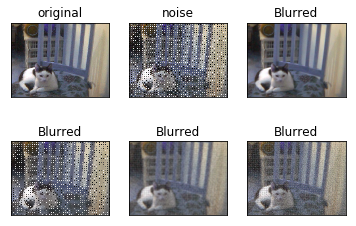

In [40]:
plt.subplot(231),plt.imshow(img),plt.title('original')
plt.xticks([]), plt.yticks([]) 
rows,cols=img.shape[:2]
row=0
for i in range(rows):
    for j in range(cols):
        if ((i%2==0)and(j%2==0)):
            img[i][j]=np.random.randint(0,255)
            
plt.subplot(232),plt.imshow(img),plt.title('noise')
plt.xticks([]), plt.yticks([])      
               
median = cv2.medianBlur(img,5)

plt.subplot(233),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([]) 
        
blur = cv2.bilateralFilter(img,20,75,75)

plt.subplot(234),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])      

blur = cv2.GaussianBlur(img,(9,9),sigmaX=5,sigmaY=6)

plt.subplot(235),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])

blur = cv2.blur(img,(5,5))

plt.subplot(236),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()